In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns

In [2]:
#Read dataset
survival = pd.read_csv('survival_data.csv', sep=',', header=None, names=['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes', 'Survival_Status'])

In [3]:
print type(survival)

<class 'pandas.core.frame.DataFrame'>


In [4]:
#Determine data types for each feature
survival.dtypes

Patient_Age          int64
Year_of_Operation    int64
Number_of_Nodes      int64
Survival_Status      int64
dtype: object

In [5]:
#Dataset dimensions
print survival.shape

(306, 4)


In [6]:
#Check column names
survival.columns

Index([u'Patient_Age', u'Year_of_Operation', u'Number_of_Nodes',
       u'Survival_Status'],
      dtype='object')

In [7]:
#Print dataset
print(survival)

     Patient_Age  Year_of_Operation  Number_of_Nodes  Survival_Status
0             30                 64                1                1
1             30                 62                3                1
2             30                 65                0                1
3             31                 59                2                1
4             31                 65                4                1
5             33                 58               10                1
6             33                 60                0                1
7             34                 59                0                2
8             34                 66                9                2
9             34                 58               30                1
10            34                 60                1                1
11            34                 61               10                1
12            34                 67                7                1
13            34    

In [8]:
#Summary of dataset
print("Number of rows: " + str(survival.shape[0]))
print("Number of columns: " + str(survival.shape[1]))
print("Columns Names: " + ", ".join(survival.columns))
print
print("Number of target variables")
print(survival.iloc[:,-1].value_counts())
print
print("Proportion of target variables")
print(survival.iloc[:,-1].value_counts(normalize = True))

Number of rows: 306
Number of columns: 4
Columns Names: Patient_Age, Year_of_Operation, Number_of_Nodes, Survival_Status

Number of target variables
1    225
2     81
Name: Survival_Status, dtype: int64

Proportion of target variables
1    0.735294
2    0.264706
Name: Survival_Status, dtype: float64


In [9]:
#Generate frequency table for Survival Status 
#1 = the patient survived 5 years or longer, 2 = the patient died within 5 year
survival['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

In [10]:
survival.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
#Check for missing values in the dataset
survival.isnull().values.any()

False

In [12]:
#Summary statistics for patients that have survived 5 years or longer
survive = survival[survival['Survival_Status'] == 1]
survive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [13]:
#Summary statistics for patients that have died within 5 year
nonSurvive = survival[survival['Survival_Status'] == 2]
nonSurvive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [14]:
#Load python packages
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy

<function matplotlib.pyplot.show>

C:\Users\janar\Anaconda2\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


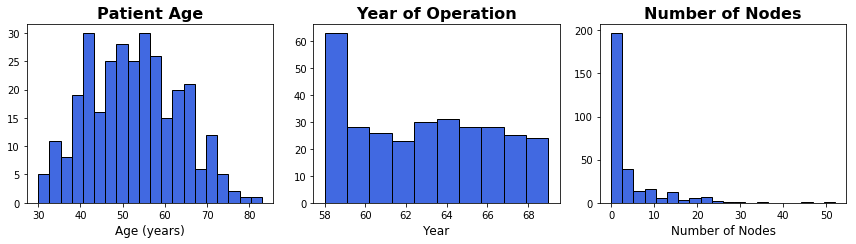

In [15]:
#Histogram examining the distribution of Patient Ages, Year of Operation and Number of Positive Axillary Nodes Detected

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5), tight_layout=True)
ax0.hist(x=survival['Patient_Age'], bins=20, histtype='bar', edgecolor='black', color='royalblue')
ax0.set_title('Patient Age', fontsize=16, fontweight = 'bold')
ax0.set_xlabel('Age (years)', fontsize = 12)

ax1.hist(x=survival['Year_of_Operation'], bins=10, histtype='bar', edgecolor='black', color='royalblue')
ax1.set_title('Year of Operation', fontsize=16, fontweight = 'bold')
ax1.set_xlabel('Year', fontsize = 12)

ax2.hist(x=survival['Number_of_Nodes'], bins=20, histtype='bar', edgecolor='black', color='royalblue')
ax2.set_title('Number of Nodes', fontsize=16, fontweight = 'bold')
ax2.set_xlabel('Number of Nodes', fontsize = 12)

plt.show

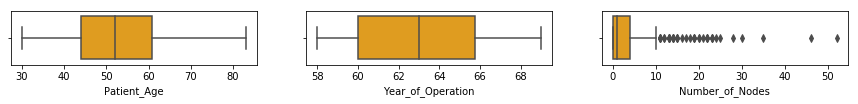

In [16]:
#Box plots examining the distribution of Patient Aprint(statistics.mean([1,2,4]))ges, Year of Operation and Number of Positive Axillary Nodes Detected

fig, axes = plt.subplots(1, 3, figsize=(15, 1))
for idx, feature in enumerate(list(survival.columns)[:-1]):
    sns.boxplot( x=feature, data=survival, ax=axes[idx], color='orange')
plt.show()    

In [17]:
print("mean: %.2f SD: %.2f") % (survival['Patient_Age'].mean(), survival['Patient_Age'].std())

mean: 52.46 SD: 10.80


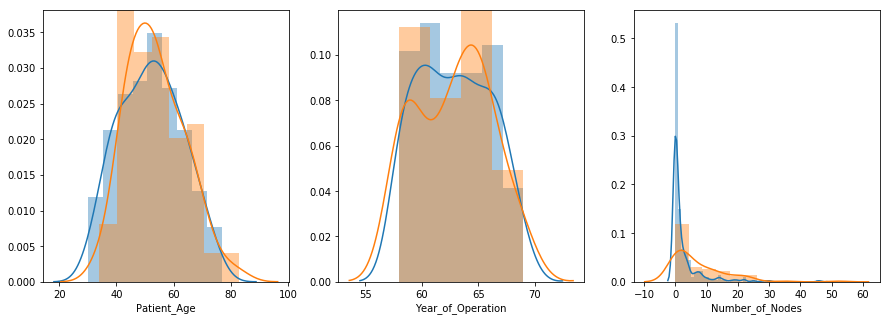

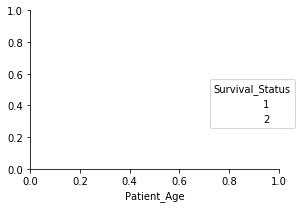

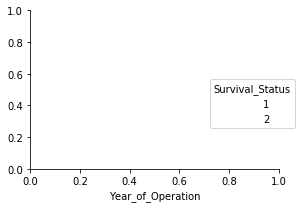

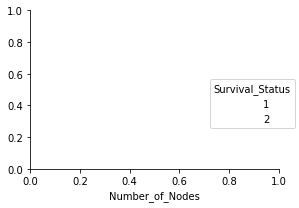

In [18]:
#Distribution and Probability Density Function plots of untransformed versus cube root transformed 
#Number of Nodes grouped by survival
    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.FacetGrid(survival, hue = "Survival_Status").add_legend().map(sns.distplot, "Patient_Age", ax = axes[0])
sns.FacetGrid(survival, hue = "Survival_Status").add_legend().map(sns.distplot, "Year_of_Operation", ax = axes[1])
sns.FacetGrid(survival, hue = "Survival_Status").add_legend().map(sns.distplot, "Number_of_Nodes", ax = axes[2])
plt.show()


survival['Year_of_Operation'].plot.hist(histtype='bar', bins=10, edgecolor='black', color='royalblue', normed = True)
plt.title('Year of Operation', fontsize=20, fontweight = 'bold')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Frequency', fontsize = 16)
plt.show()

In [19]:
survival2 = survival.copy()

f = lambda x: np.sign(x) * np.power(abs(x), 1./3)
survival2[['Number_of_Nodes']] = f(survival2[['Number_of_Nodes']])
print survival2

     Patient_Age  Year_of_Operation  Number_of_Nodes  Survival_Status
0             30                 64         1.000000                1
1             30                 62         1.442250                1
2             30                 65         0.000000                1
3             31                 59         1.259921                1
4             31                 65         1.587401                1
5             33                 58         2.154435                1
6             33                 60         0.000000                1
7             34                 59         0.000000                2
8             34                 66         2.080084                2
9             34                 58         3.107233                1
10            34                 60         1.000000                1
11            34                 61         2.154435                1
12            34                 67         1.912931                1
13            34    

<function matplotlib.pyplot.show>

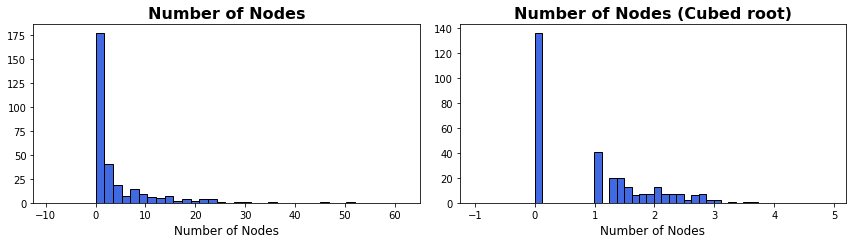

In [20]:
#Compare histograms of original and cube root transformed Number of Nodes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.5), tight_layout=True)
ax0.hist(x=survival['Number_of_Nodes'], bins=30, histtype='bar', edgecolor='black', color='royalblue')
ax0.set_title('Number of Nodes', fontsize=16, fontweight = 'bold')
ax0.set_xlim(-12.5, 65)
ax0.set_xlabel('Number of Nodes', fontsize = 12)

ax1.hist(x=survival2['Number_of_Nodes'], bins=30, histtype='bar', edgecolor='black', color='royalblue')
ax1.set_title('Number of Nodes (Cubed root)', fontsize=16, fontweight = 'bold')
ax1.set_xlim(-1.25, 5.2)
ax1.set_xlabel('Number of Nodes', fontsize = 12)

plt.show

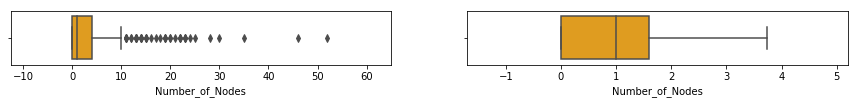

In [21]:
#Box plot examining the distribution of the cubed root of the Number of Positive Axillary Nodes Detected

fig, axes = plt.subplots(1, 2, figsize=(15, 1))
ax1=sns.boxplot(x='Number_of_Nodes', data=survival, ax = axes[0], color = 'orange')
ax1.set(xlim=(-12.5, 65))
ax2=sns.boxplot(x='Number_of_Nodes', data=survival2, ax = axes[1], color = 'orange') 
ax2.set(xlim=(-1.7, 5.2))
plt.show()  

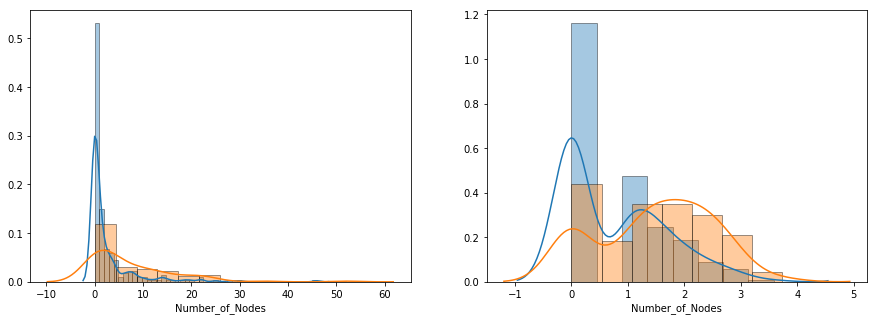

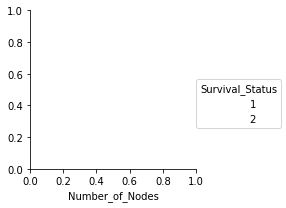

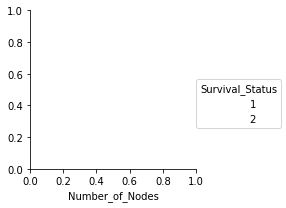

In [22]:
#Distribution and Probability Density Function plots of untransformed versus cube root transformed 
#Number of Nodes grouped by survival

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.FacetGrid(survival, hue = "Survival_Status").map(sns.distplot, "Number_of_Nodes", hist_kws={'edgecolor': 'black'}, ax = axes[0]).add_legend()
sns.FacetGrid(survival2, hue = "Survival_Status").map(sns.distplot, "Number_of_Nodes", hist_kws={'edgecolor': 'black'}, ax = axes[1]).add_legend()
plt.show()

In [23]:
survival.cov()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
Patient_Age,116.714583,3.142912,-4.907082,0.324397
Year_of_Operation,3.142912,10.558631,-0.087946,-0.006847
Number_of_Nodes,-4.907082,-0.087946,51.691118,0.911090
Survival_Status,0.324397,-0.006847,0.911090,0.195275


In [24]:
survival.corr()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
Patient_Age,1.000000,0.089529,-0.063176,0.067950
Year_of_Operation,0.089529,1.000000,-0.003764,-0.004768
Number_of_Nodes,-0.063176,-0.003764,1.000000,0.286768
Survival_Status,0.067950,-0.004768,0.286768,1.000000


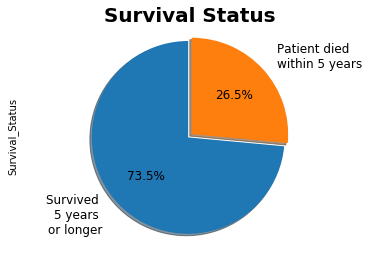

In [25]:
labels = 'Survived \n5 years \nor longer', 'Patient died \nwithin 5 years'
explode = (0, 0.05)
ax1 = survival['Survival_Status'].value_counts().plot(kind='pie', labeldistance = 1.2, autopct='%1.1f%%', explode = explode, startangle=90, labels=labels, shadow=True, fontsize=12)
ax1.axis('equal')
ax1.set_title('Survival Status', fontsize=20, fontweight = 'bold')
plt.show()

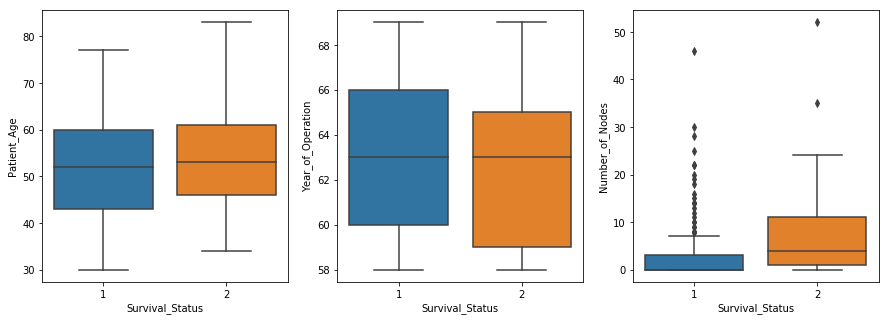

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(survival.columns)[:-1]):
    sns.boxplot( x='Survival_Status', y=feature, data=survival, ax=axes[idx])
plt.show()

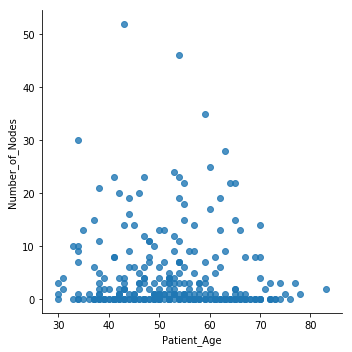

In [27]:
sns.lmplot(fit_reg = False, data = survival, y = 'Number_of_Nodes', x = 'Patient_Age')

<function matplotlib.pyplot.show>

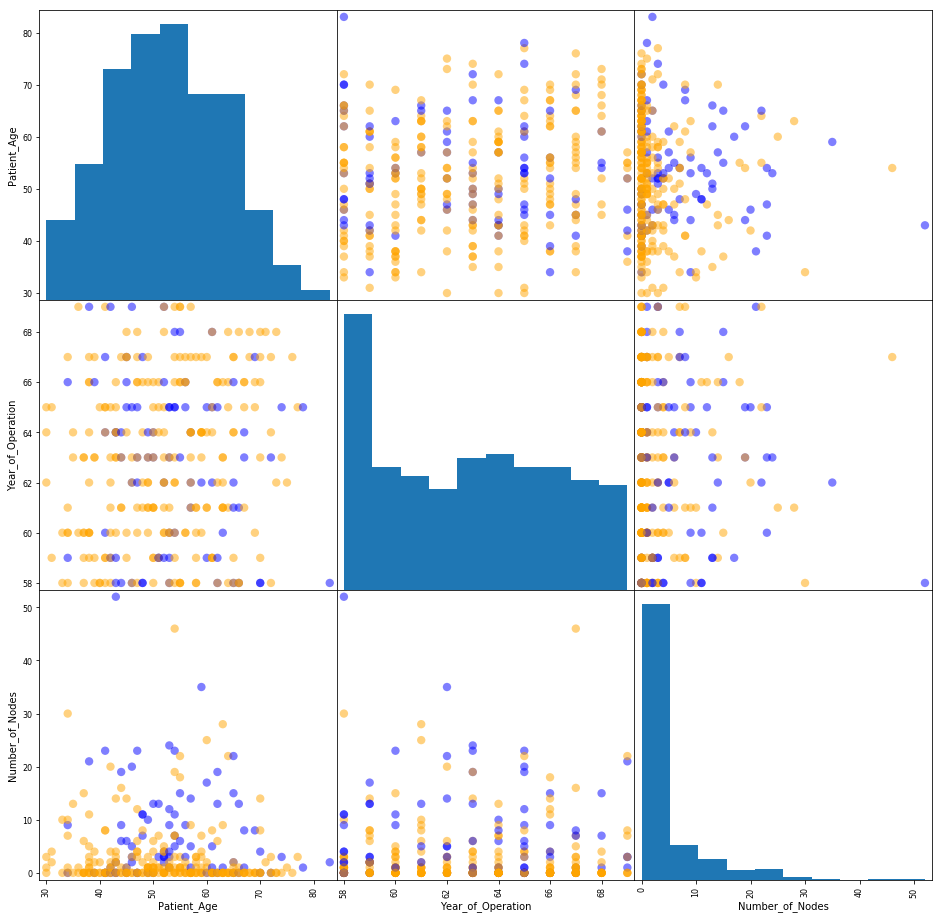

In [28]:
v = survival['Survival_Status'].unique()
m_1 = survival['Survival_Status'] == v[0]
m_2 = survival['Survival_Status'] == v[1]
survival.loc[m_1, 'Survival_Status'] = 0
survival.loc[m_2, 'Survival_Status'] = 1
survival['Survival_Status'].value_counts()

colors_palette = {0: 'orange', 1: 'blue'}

colors = [colors_palette[c] for c in survival['Survival_Status']]

from pandas.plotting import scatter_matrix
scatter_matrix(survival[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']], s = 70, alpha = 0.5, figsize = (16, 16), c = colors, diagonal = 'hist', marker = 'o', grid = True)
plt.show

In [29]:
print("Mean age of patients surviving longer than 5 years:", round(np.mean(survival[survival['Survival_Status'] == 1]['Patient_Age'])))
print("Mean age of patients surviving less than 5 years:", round(np.mean(survival[survival['Survival_Status'] == 2]['Patient_Age'])))

('Mean age of patients surviving longer than 5 years:', 54.0)
('Mean age of patients surviving less than 5 years:', nan)


In [30]:
survive = survival[survival['Survival_Status'] == 1]
survive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,1.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,1.0
25%,46.000000,59.000000,1.000000,1.0
50%,53.000000,63.000000,4.000000,1.0
75%,61.000000,65.000000,11.000000,1.0
max,83.000000,69.000000,52.000000,1.0


In [31]:
nonSurvive = survival[survival['Survival_Status'] == 2]
nonSurvive.describe()

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


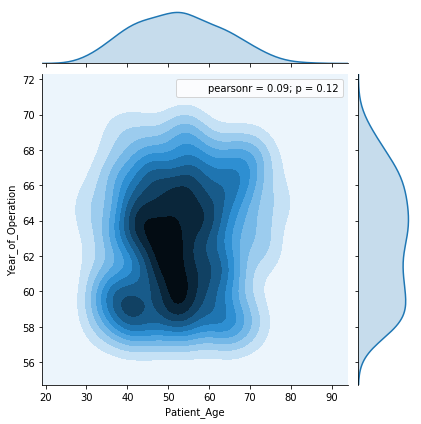

In [32]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Year_of_Operation', data = survival)
plt.show()

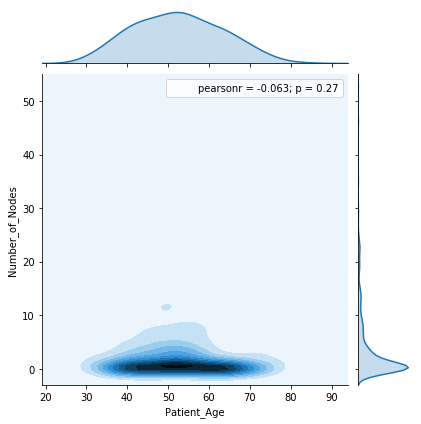

In [33]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Number_of_Nodes', data = survival)
plt.show()

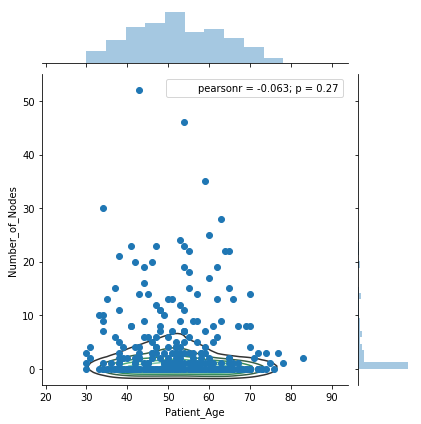

In [34]:
sns.jointplot(x= 'Patient_Age', y='Number_of_Nodes', data=survival).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

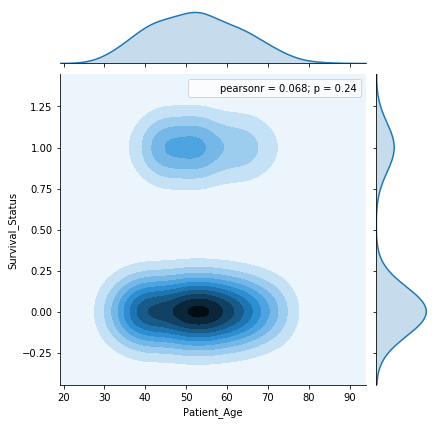

In [35]:
sns.jointplot(x= 'Patient_Age',kind = 'kde', y='Survival_Status', data = survival)
plt.show()

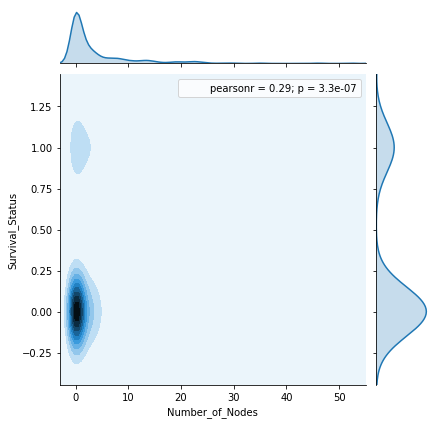

In [36]:
sns.jointplot(x= 'Number_of_Nodes',kind = 'kde', y='Survival_Status', data = survival)
plt.show()

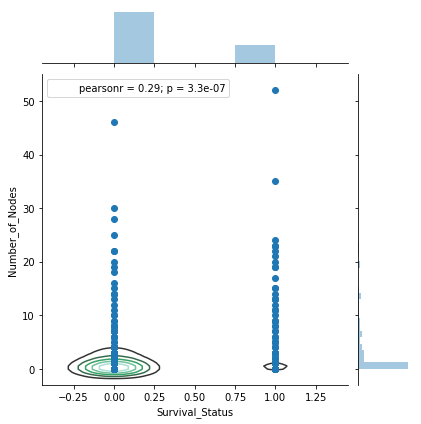

In [37]:
sns.jointplot(x= 'Survival_Status', y='Number_of_Nodes', data=survival).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

In [38]:
from sklearn import preprocessing

#Standardize to re-scale features so that they have the properties of a standard normal distribution (mean = 0 and SD = 1)
std_scale = preprocessing.StandardScaler().fit(survival[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']])
survival_std = std_scale.transform(survival[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']])

#Min-Max scaling (Normalization) of features to a fixed range of 0-1.
minmax_scale = preprocessing.MinMaxScaler().fit(survival[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']])
survival_minmax = minmax_scale.transform(survival[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']])

In [39]:
#Output Mean and Standard Deviation values for the 'standardized' data
print('Mean after standardization:\nPatient Age={:.2f}, Year of Operation={:.2f}, Number of Nodes={:.2f}'
      .format(survival_std[:,0].mean(), survival_std[:,1].mean(), survival_std[:,2].mean()))
print('\nStandard deviation after standardization:\nPatient Age={:.2f}, Year of Operation={:.2f}, Number of Nodes={:.2f}'
      .format(survival_std[:,0].std(), survival_std[:,1].std(), survival_std[:,2].std()))

Mean after standardization:
Patient Age=0.00, Year of Operation=0.00, Number of Nodes=0.00

Standard deviation after standardization:
Patient Age=1.00, Year of Operation=1.00, Number of Nodes=1.00


In [40]:
#Output Mean and Standard Deviation values for the 'normalized' data
print('Min-value after min-max scaling:\nPatient Age={:.2f}, Year of Operation={:.2f}'
      .format(survival_minmax[:,0].min(), survival_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nPatient Age={:.2f}, Year of Operation={:.2f}'
      .format(survival_minmax[:,0].max(), survival_minmax[:,1].max()))

Min-value after min-max scaling:
Patient Age=0.00, Year of Operation=0.00

Max-value after min-max scaling:
Patient Age=1.00, Year of Operation=1.00


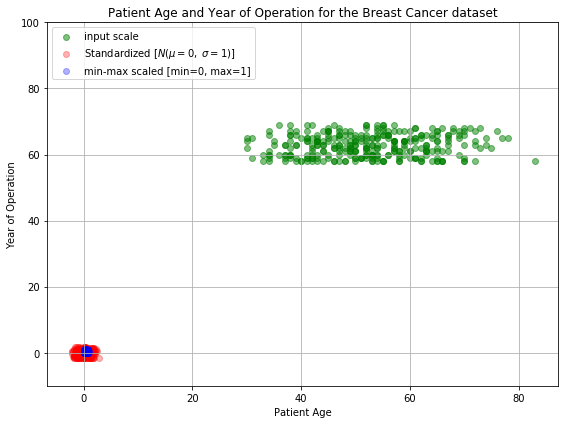

In [41]:
#Plot Patient Age versus Year of Operation for the untreated and 'standardized' data.
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(survival['Patient_Age'], survival['Year_of_Operation'], color='green', label='input scale', alpha=0.5)

    plt.scatter(survival_std[:,0], survival_std[:,1], color='red', label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)
    
    plt.scatter(survival_minmax[:,0], survival_minmax[:,1], color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Patient Age and Year of Operation for the Breast Cancer dataset')
    plt.xlabel('Patient Age')
    plt.ylim(-10, 100)
    plt.ylabel('Year of Operation')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

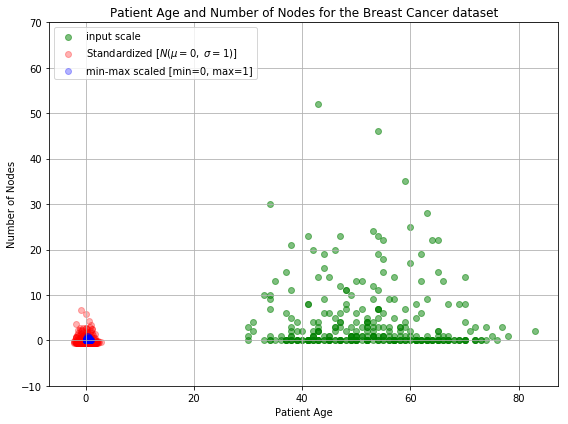

In [42]:
#Plot Patient Age versus Number of Nodes for the untreated and 'standardized' data.
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(survival['Patient_Age'], survival['Number_of_Nodes'], color='green', label='input scale', alpha=0.5)

    plt.scatter(survival_std[:,0], survival_std[:,2], color='red', label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)
    
    plt.scatter(survival_minmax[:,0], survival_minmax[:,2], color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Patient Age and Number of Nodes for the Breast Cancer dataset')
    plt.xlabel('Patient Age')
    plt.ylim(-10, 70)
    plt.ylabel('Number of Nodes')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

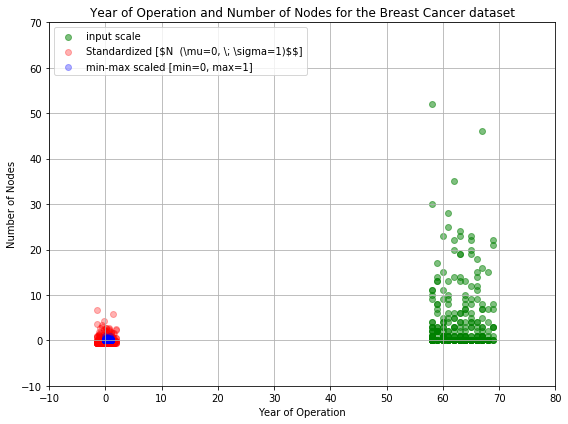

In [43]:
#Plot Year of Operation versus Number of Nodes for the untreated and 'standardized' data.
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(survival['Year_of_Operation'], survival['Number_of_Nodes'], color='green', label='input scale', alpha=0.5)

    plt.scatter(survival_std[:,1], survival_std[:,2], color='red', label='Standardized [$N  (\mu=0, \; \sigma=1)$$]', alpha=0.3)
    
    plt.scatter(survival_minmax[:,1], survival_minmax[:,2], color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Year of Operation and Number of Nodes for the Breast Cancer dataset')
    plt.xlabel('Year of Operation')
    plt.ylim(-10, 70)
    plt.ylabel('Number of Nodes')
    plt.xlim(-10, 80)
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [44]:
df2 = survival.drop(survival.columns[[1]], 1)
ar_std2 = [[x[0],x[2]] for x in survival_std]

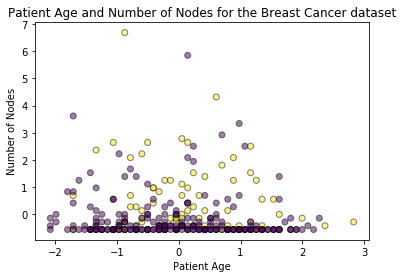

In [45]:
#Plot of Year of Operation versus Number of Nodes for the untreated and 'standardized' data.
plt.scatter(x=survival_std[:, 0], y=survival_std[:,2], c=df2['Survival_Status'], alpha=0.5, edgecolor='black')
plt.title('Patient Age and Number of Nodes for the Breast Cancer dataset')
plt.xlabel('Patient Age')
plt.ylabel('Number of Nodes')
plt.show()

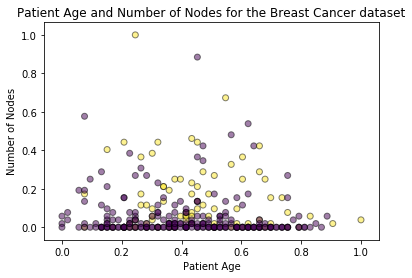

In [46]:
#Plot of Year of Operation versus Number of Nodes for the untreated and 'normalized' data.
plt.scatter(x=survival_minmax[:, 0], y=survival_minmax[:,2], c=df2['Survival_Status'], alpha=0.5, edgecolor='black')
plt.title('Patient Age and Number of Nodes for the Breast Cancer dataset')
plt.xlabel('Patient Age')
plt.ylabel('Number of Nodes')
plt.show()

In [47]:
#Convert array of 'standardized' data to a data frame
columns =['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']
df_std = pd.DataFrame(survival_std, columns = columns)
df_std

,Patient_Age,Year_of_Operation,Number_of_Nodes
0,-2.082140,0.353584,-0.421592
1,-2.082140,-0.262921,-0.142959
2,-2.082140,0.661837,-0.560909
3,-1.989426,-1.187680,-0.282275
4,-1.989426,0.661837,-0.003642
5,-1.803996,-1.495933,0.832257
6,-1.803996,-0.879427,-0.560909
7,-1.711282,-1.187680,-0.560909
8,-1.711282,0.970090,0.692941
9,-1.711282,-1.495933,3.618589


<function matplotlib.pyplot.show>

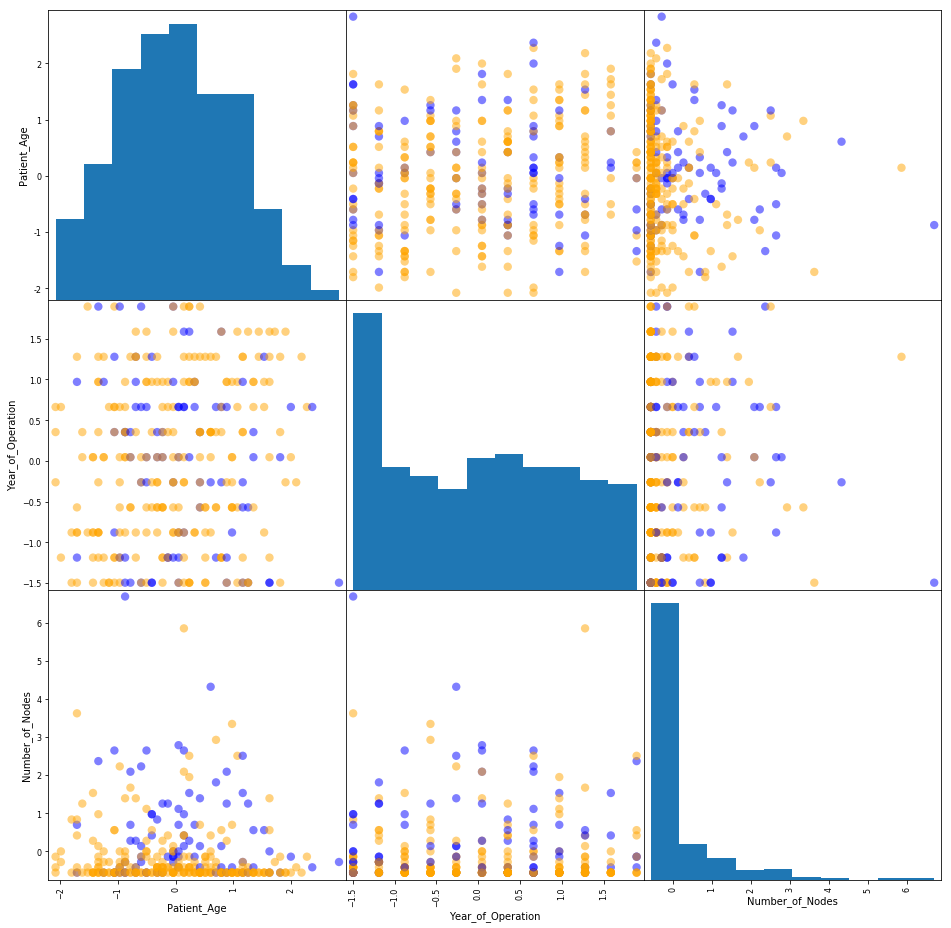

In [48]:
#Plot scattermatrix for 'standardized' data
v = survival['Survival_Status'].unique()
m_1 = survival['Survival_Status'] == v[0]
m_2 = survival['Survival_Status'] == v[1]
survival.loc[m_1, 'Survival_Status'] = 0
survival.loc[m_2, 'Survival_Status'] = 1
survival['Survival_Status'].value_counts()

colors_palette = {0: 'orange', 1: 'blue'}

colors = [colors_palette[c] for c in survival['Survival_Status']]

from pandas.plotting import scatter_matrix
scatter_matrix(df_std[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']], s = 70, alpha = 0.5, figsize = (16, 16), c = colors, diagonal = 'hist', marker = 'o', grid = True)
plt.show

In [49]:
#Convert array of 'normalized' data to a data frame
columns =['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']
df_minmax = pd.DataFrame(survival_minmax, columns = columns)
df_minmax

,Patient_Age,Year_of_Operation,Number_of_Nodes
0,0.000000,0.545455,0.019231
1,0.000000,0.363636,0.057692
2,0.000000,0.636364,0.000000
3,0.018868,0.090909,0.038462
4,0.018868,0.636364,0.076923
5,0.056604,0.000000,0.192308
6,0.056604,0.181818,0.000000
7,0.075472,0.090909,0.000000
8,0.075472,0.727273,0.173077
9,0.075472,0.000000,0.576923


<function matplotlib.pyplot.show>

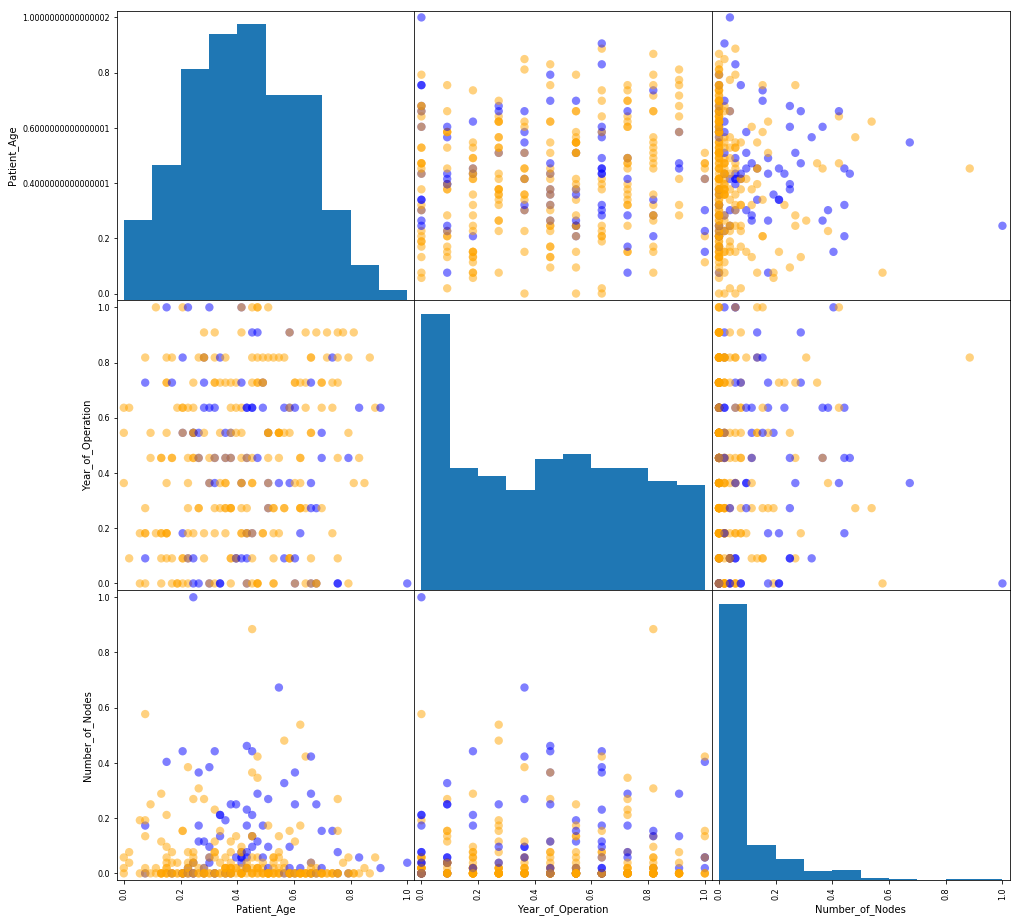

In [50]:
#Plot scattermatrix for 'normalized' data
v = survival['Survival_Status'].unique()
m_1 = survival['Survival_Status'] == v[0]
m_2 = survival['Survival_Status'] == v[1]
survival.loc[m_1, 'Survival_Status'] = 0
survival.loc[m_2, 'Survival_Status'] = 1
survival['Survival_Status'].value_counts()

colors_palette = {0: 'orange', 1: 'blue'}

colors = [colors_palette[c] for c in survival['Survival_Status']]

from pandas.plotting import scatter_matrix
scatter_matrix(df_minmax[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']], s = 70, alpha = 0.5, figsize = (16, 16), c = colors, diagonal = 'hist', marker = 'o', grid = True)
plt.show

In [51]:
df_std['Survival_Status']= survival['Survival_Status']
df_std

,Patient_Age,Year_of_Operation,Number_of_Nodes,Survival_Status
0,-2.082140,0.353584,-0.421592,0
1,-2.082140,-0.262921,-0.142959,0
2,-2.082140,0.661837,-0.560909,0
3,-1.989426,-1.187680,-0.282275,0
4,-1.989426,0.661837,-0.003642,0
5,-1.803996,-1.495933,0.832257,0
6,-1.803996,-0.879427,-0.560909,0
7,-1.711282,-1.187680,-0.560909,1
8,-1.711282,0.970090,0.692941,1
9,-1.711282,-1.495933,3.618589,0


In [52]:
#K Nearest Neighbors Classifier
array = df_std.as_matrix()
df_std_data = array[:,:3]
df_std_target = array[:,3]

In [53]:
print df_std

     Patient_Age  Year_of_Operation  Number_of_Nodes  Survival_Status
0      -2.082140           0.353584        -0.421592                0
1      -2.082140          -0.262921        -0.142959                0
2      -2.082140           0.661837        -0.560909                0
3      -1.989426          -1.187680        -0.282275                0
4      -1.989426           0.661837        -0.003642                0
5      -1.803996          -1.495933         0.832257                0
6      -1.803996          -0.879427        -0.560909                0
7      -1.711282          -1.187680        -0.560909                1
8      -1.711282           0.970090         0.692941                1
9      -1.711282          -1.495933         3.618589                0
10     -1.711282          -0.879427        -0.421592                0
11     -1.711282          -0.571174         0.832257                0
12     -1.711282           1.278342         0.414308                0
13     -1.711282    

In [54]:
print df_std_target.shape

(306L,)


In [55]:
df_std_feature_names = ['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']
print df_std_feature_names

['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']


In [56]:
print df_std_target

[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]


In [57]:
df_std_target_name = ['Survival_Status']
print df_std_target_name

['Survival_Status']


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df_std_data, df_std_target, test_size = 0.5, random_state=4)

In [60]:
print x_train

[[ 5.02961676e-02  4.53312904e-02 -5.60908620e-01]
 [-1.80399628e+00 -1.49593258e+00  8.32257270e-01]
 [-1.24770854e+00 -1.49593258e+00 -5.60908620e-01]
 [-1.34042317e+00 -1.18767981e+00 -2.82275442e-01]
 [-1.34042317e+00 -8.79427033e-01 -4.21592031e-01]
 [-3.20562321e-01  3.53584065e-01  8.32257270e-01]
 [ 5.02961676e-02 -1.49593258e+00 -3.64226377e-03]
 [ 6.06583901e-01 -8.79427033e-01 -5.60908620e-01]
 [-5.05991565e-01  1.58659516e+00 -3.64226377e-03]
 [ 1.43010790e-01 -8.79427033e-01 -1.42958853e-01]
 [-5.05991565e-01  1.27834239e+00 -5.60908620e-01]
 [ 1.16287163e+00 -1.18767981e+00 -2.82275442e-01]
 [ 1.34830088e+00  9.70089614e-01 -5.60908620e-01]
 [ 2.35725412e-01  9.70089614e-01  1.94678998e+00]
 [ 1.34830088e+00 -5.71174259e-01 -5.60908620e-01]
 [ 2.35725412e-01 -1.49593258e+00 -4.21592031e-01]
 [-4.24184546e-02 -1.18767981e+00 -2.82275442e-01]
 [-1.15499392e+00 -1.49593258e+00 -5.60908620e-01]
 [-1.71128165e+00 -8.79427033e-01 -4.21592031e-01]
 [-1.71128165e+00 -1.18767981e+

In [61]:
x_train.shape

(153L, 3L)

In [62]:
y_train

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.])

In [63]:
y_train.shape

(153L,)

In [64]:
x_test

array([[-4.13276943e-01,  9.70089614e-01, -5.60908620e-01],
       [ 4.21154656e-01, -5.71174259e-01, -5.60908620e-01],
       [-1.43313779e+00, -8.79427033e-01, -5.60908620e-01],
       [-4.24184546e-02,  1.89484794e+00, -1.42958853e-01],
       [ 2.18273248e+00,  1.27834239e+00, -5.60908620e-01],
       [ 1.25558626e+00,  1.58659516e+00, -5.60908620e-01],
       [ 8.84727767e-01, -1.18767981e+00,  1.25020704e+00],
       [ 5.02961676e-02, -8.79427033e-01, -4.21592031e-01],
       [-1.71128165e+00, -8.79427033e-01, -5.60908620e-01],
       [-1.34042317e+00,  1.89484794e+00,  2.36473975e+00],
       [-3.20562321e-01, -2.62921484e-01, -5.60908620e-01],
       [-6.91420810e-01,  6.61836839e-01,  2.74990914e-01],
       [-1.80399628e+00, -8.79427033e-01, -5.60908620e-01],
       [ 1.34830088e+00,  9.70089614e-01, -5.60908620e-01],
       [-8.76850054e-01, -1.18767981e+00, -2.82275442e-01],
       [ 2.27544710e+00,  6.61836839e-01, -1.42958853e-01],
       [-1.06227930e+00, -1.18767981e+00

In [65]:
x_test.shape

(153L, 3L)

In [66]:
y_test

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
y_test.shape

(153L,)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
#K-Nearest Neighbors Classifier (K = 3)
clf = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', p = 2)


In [70]:
fit = clf.fit(x_train, y_train)

In [71]:
y_pre = fit.predict(x_test)

In [72]:
y_pre

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [73]:
y_pre.shape

(153L,)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
#Confusion Matrix 
#K-Nearest Neighbors Classifier (K = 3)
cm = confusion_matrix(y_test, y_pre)
print cm

[[102  17]
 [ 21  13]]


In [76]:
from sklearn.metrics import classification_report

In [77]:
#Classification Report 
#K-Nearest Neighbors Classifier (K = 3)
print classification_report(y_test, y_pre)

             precision    recall  f1-score   support

        0.0       0.83      0.86      0.84       119
        1.0       0.43      0.38      0.41        34

avg / total       0.74      0.75      0.75       153



In [78]:
#Score with Single Train/Test Split
#K-Nearest Neighbors Classifier (K = 3)
print "[Train/test split]: {:.5f}".format(clf.score(x_test, y_test))

[Train/test split]: 0.75163


In [79]:
from sklearn.model_selection import KFold

In [80]:
kf = KFold(n_splits = 5, random_state = 4)

In [81]:
for train_index, test_index in kf.split(df_std_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = df_std_data[train_index], df_std_data[test_index]
    y_train, y_test = df_std_target[train_index], df_std_target[test_index]

('TRAIN:', array([ 62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 2

In [82]:
for k, (train_index, test_index) in enumerate(kf.split(df_std_data)):
    
    x_train, x_test = df_std_data[train_index], df_std_data[test_index]
    y_train, y_test = df_std_target[train_index], df_std_target[test_index]
    
    clf.fit(x_train, y_train)
    print "[fold {0}] score: {1:.5f}".format(k, clf.score(x_test, y_test))

[fold 0] score: 0.50000
[fold 1] score: 0.65574
[fold 2] score: 0.73770
[fold 3] score: 0.75410
[fold 4] score: 0.68852


In [83]:
#Grid searh for parameter optimization
from sklearn.model_selection import GridSearchCV

In [84]:
search_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 10]}, {'metric': ['euclidean']}, {'weights': ['uniform']}]

In [85]:
scorer = ['accuracy']

In [86]:
# Partition the data into training and testing splits, using 75%
# of the data for training and the remaining 25% for testing
print("[INFO] constructing training/testing split...")
(x_train, y_train, x_test, y_test) = train_test_split(df_std_data, df_std_target, test_size=0.25, random_state=42)

[INFO] constructing training/testing split...


In [87]:
import time

# tune the hyperparameters via a cross-validated grid search
print("[INFO] tuning hyperparameters via grid search")
model = KNeighborsClassifier(n_jobs=-1)
grid = GridSearchCV(model, search_grid, iid = False)
start = time.time()
grid.fit(x_train, x_test)
 
# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(x_train, x_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))
print("[INFO] grid search best parameters: {}".format(
	grid.best_params_))

[INFO] tuning hyperparameters via grid search
[INFO] grid search took 7.32 seconds
[INFO] grid search accuracy: 78.17%
[INFO] grid search best parameters: {'n_neighbors': 10}


In [88]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=4)
model = KNeighborsClassifier(n_jobs=-1)
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, x_train, x_test, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)") % (results.mean(), results.std())

AUC: 0.645 (0.116)


In [89]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [91]:
# Decision Tree Approach
survival_data = survival[['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes']]
survival_data.head()

,Patient_Age,Year_of_Operation,Number_of_Nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [92]:
survival_target = survival[['Survival_Status']]
survival_target.head()

,Survival_Status
0,0
1,0
2,0
3,0
4,0


In [93]:
x_train, x_test, y_train, y_test = \
    train_test_split(survival_data, survival_target, test_size=0.5, random_state=0)

In [94]:
x_train.head()

,Patient_Age,Year_of_Operation,Number_of_Nodes
166,53,63,0
125,50,64,0
24,38,69,21
30,38,66,0
77,44,63,1


In [95]:
y_train.head()

,Survival_Status
166,0
125,1
24,1
30,0
77,0


In [96]:
y_train.Survival_Status.value_counts()

0    123
1     30
Name: Survival_Status, dtype: int64

In [97]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(x_train, y_train)
y_pre = fit.predict(x_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

[[83 19]
 [40 11]]


In [99]:
from sklearn.metrics import classification_report
print classification_report(y_test, y_pre)

             precision    recall  f1-score   support

          0       0.67      0.81      0.74       102
          1       0.37      0.22      0.27        51

avg / total       0.57      0.61      0.58       153



In [100]:
from sklearn import tree
with open('survival_tree.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
        feature_names=['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes'],
        rounded=True, special_characters=True, filled=True)

In [102]:
# using grid search to optimize parameters
max_depth_range = range(3,7)
min_samples_split_range = range(20, 80, 10)
min_samples_leaf_range = [1, 10, 20]
max_leaf_nodes_range = [3, 6, 10]
param_grid = dict(max_depth=max_depth_range,
                  min_samples_split=min_samples_split_range,
                  min_samples_leaf=min_samples_leaf_range,
                  max_leaf_nodes=max_leaf_nodes_range)

In [108]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, param_grid, cv=5, scoring='recall')
start = time.time()
grid.fit(survival_data, survival_target)

# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(
	time.time() - start))
print("[INFO] grid search best recall:")
print(grid.best_score_)
print("[INFO] grid search best parameters: ")
print(grid.best_params_)

[INFO] grid search took 4.33 seconds
[INFO] grid search best recall:
0.4111519607843137
[INFO] grid search best parameters: 
{'min_samples_split': 20, 'max_leaf_nodes': 3, 'max_depth': 3, 'min_samples_leaf': 1}


In [111]:
# trying new ranges based on above results
max_depth_range = range(2,5)
min_samples_split_range = range(5, 35, 5)
min_samples_leaf_range = range(1, 6)
max_leaf_nodes_range = range(2, 6)
param_grid = dict(max_depth=max_depth_range,
                  min_samples_split=min_samples_split_range,
                  min_samples_leaf=min_samples_leaf_range,
                  max_leaf_nodes=max_leaf_nodes_range)

In [112]:
grid = GridSearchCV(clf, param_grid, cv=5, scoring='recall')
start = time.time()
grid.fit(survival_data, survival_target)

# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(
	time.time() - start))
print("[INFO] grid search best recall:")
print(grid.best_score_)
print("[INFO] grid search best parameters: ")
print(grid.best_params_)

[INFO] grid search took 6.94 seconds
[INFO] grid search best recall:
0.4111519607843137
[INFO] grid search best parameters: 
{'min_samples_split': 5, 'max_leaf_nodes': 3, 'max_depth': 2, 'min_samples_leaf': 1}


In [113]:
clf = DecisionTreeClassifier(**grid.best_params_)
fit = clf.fit(x_train, y_train)
y_pre = fit.predict(x_test)

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

[[94  8]
 [46  5]]


In [115]:
from sklearn.metrics import classification_report
print classification_report(y_test, y_pre)

             precision    recall  f1-score   support

          0       0.67      0.92      0.78       102
          1       0.38      0.10      0.16        51

avg / total       0.58      0.65      0.57       153



In [116]:
with open('survival_tree_opt_params.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
        feature_names=['Patient_Age', 'Year_of_Operation', 'Number_of_Nodes'],
        rounded=True, special_characters=True, filled=True)